# Classification

In [2]:
import pandas as pd
import numpy as np

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# This dataset comes from the ISLR R package, pull from the install script
default_data = pd.read_csv('Data/Default.csv')

# Grab the label array using factorize 
default_data['default2'] = default_data.default.factorize()[0]
default_data['student2'] = default_data.student.factorize()[0]
default_data.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


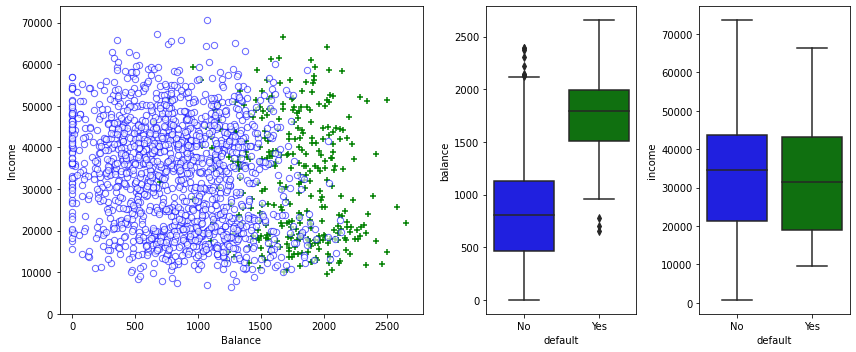

In [3]:
# set up the layout/size of the plots
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Sample a subset of the no values
default_data_no = default_data[
    default_data.default2 == 0
    ].sample(frac=0.15)
# Grab all the yes's
default_data_yes = default_data[
    default_data.default2 == 1]
default_data_ = default_data_no.append(default_data_yes)

# plot a scatter plot in the first figure
ax1.scatter(
    default_data_[
        default_data_.default == 'Yes'
        ].balance,
    default_data_[
        default_data_.default == 'Yes'
        ].income,
    s=40,
    c='green',
    marker='+',
    linewidths=1
    )
ax1.scatter(
    default_data_[
        default_data_.default == 'No'
        ].balance,
    default_data_[
        default_data_.default == 'No'
        ].income,
    s=40,
    marker='o',
    linewidths='1',
    edgecolors='blue',
    facecolors='white',
    alpha=.6
    )

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

# Second fig boxplot using balance
c_scheme = {'No':'blue', 'Yes':'green'}
sns.boxplot(
    'default',
    'balance',
    data=default_data, 
    orient='v',
    ax=ax2,
    palette=c_scheme
    )
# Third figure using income
sns.boxplot(
    'default',
    'income',
    data=default_data,
    orient='v',
    ax=ax3,
    palette=c_scheme
    )

gs.tight_layout(plt.gcf())

## Logistic Regression

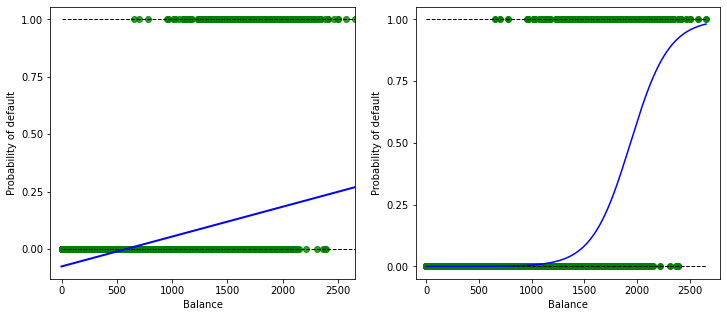

In [4]:
# Make the training data
X_train = default_data.balance.values.reshape(-1,1) 
y = default_data.default2

# Make test data
X_test = np.arange(
    default_data.balance.min(),
    default_data.balance.max()
    ).reshape(-1,1)

clf = skl_lm.LogisticRegression()
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Frist fig
sns.regplot(
    default_data.balance,
    default_data.default2,
    order=1,
    ci=None,
    scatter_kws={'color':'green'},
    line_kws={'color':'blue', 'lw':2},
    ax=ax1
    )

# Second fig
ax2.scatter(X_train, y, color='green')
ax2.plot(X_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(
        1,
        xmin=ax.xaxis.get_data_interval()[0],
        xmax=ax.xaxis.get_data_interval()[1],
        linestyles='dashed',
        lw=1
        )
    ax.hlines(
        0,
        xmin=ax.xaxis.get_data_interval()[0],
        xmax=ax.xaxis.get_data_interval()[1],
        linestyles='dashed',
        lw=1
        )
    
    # labels and tics
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

In [5]:
# get some summary stats
print(clf)
print('classes: ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression()
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65132824]


## Multple Logictic Regression

In [19]:
# run for multiple cars
X_train = sm.add_constant(default_data[['balance', 'income', 'student2']])
est = smf.logit(formula = "y ~ balance + income + student2", data=X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [25]:
# Run logistic regression for students and non-students
# Students
X_train = default_data[
    default_data.student == 'Yes'
    ].balance.values.reshape(
        default_data[default_data.student == 'Yes'].balance.size,
        1
        ) 
y = default_data[default_data.student == 'Yes'].default2

# Non-students
X_train2 = default_data[
    default_data.student == 'No'
    ].balance.values.reshape(
        default_data[default_data.student == 'No'].balance.size,
        1
        ) 
y2 = default_data[default_data.student == 'No'].default2

# Grab ranges for plotting
X_test = np.arange(
    default_data.balance.min(),
    default_data.balance.max()
    ).reshape(-1,1)

# Run logistic regresssion
clf = skl_lm.LogisticRegression()
clf2 = skl_lm.LogisticRegression()
clf.fit(X_train,y)
clf2.fit(X_train2,y2)
prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

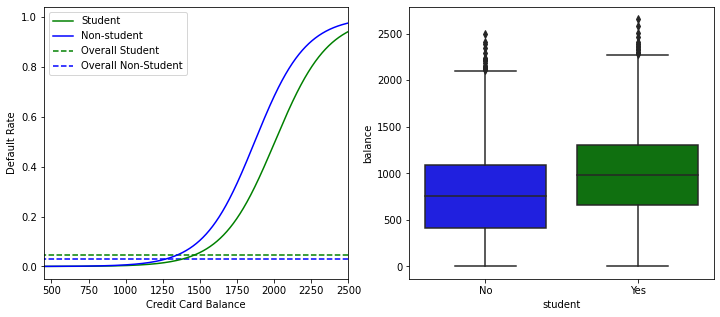

In [26]:
# Plot figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# First fig
ax1.plot(
    X_test,
    pd.DataFrame(prob)[1],
    color='green',
    label='Student'
    )

ax1.plot(
    X_test,
    pd.DataFrame(prob2)[1],
    color='blue',
    label='Non-student'
    )

ax1.hlines(
    127/2817,
    colors='green',
    label='Overall Student',
    xmin=ax1.xaxis.get_data_interval()[0],
    xmax=ax1.xaxis.get_data_interval()[1],
    linestyles='dashed'
    )

ax1.hlines(
    206/6850,
    colors='blue',
    label='Overall Non-Student',
    xmin=ax1.xaxis.get_data_interval()[0],
    xmax=ax1.xaxis.get_data_interval()[1],
    linestyles='dashed'
    )

ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Second fig
sns.boxplot(
    'student',
    'balance',
    data=default_data,
    orient='v',
    ax=ax2, 
    palette=c_scheme
    )

## Linear Discrimininant Analysis

In [28]:
Smarket_data =pd.read_csv('Data/Smarket.csv')
Smarket_data.head()
    

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [32]:
# Get our train and test set
X_train = Smarket_data[Smarket_data.Year <= 2004][['Lag1','Lag2']]
y_train = Smarket_data[Smarket_data.Year <= 2004]['Direction']

X_test = Smarket_data[Smarket_data.Year >= 2005][['Lag1','Lag2']]
y_test = Smarket_data[Smarket_data.Year >= 2005]['Direction']

# run our LDA and print summary stats
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

print("priors: ", lda.priors_)
print("means: ", lda.means_)
print("coef: ", lda.coef_)

priors:  [0.49198397 0.50801603]
means:  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
coef:  [[-0.05544078 -0.0443452 ]]


In [33]:
print(confusion_matrix(y_test, pred).T, "\n")
print(classification_report(y_test, pred, digits=3))

[[ 35  35]
 [ 76 106]] 

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [34]:
pred_p = lda.predict_proba(X_test)

print(np.unique(pred_p[:,1]>0.5, return_counts=True))
print(np.unique(pred_p[:,1]>0.9, return_counts=True))

(array([False,  True]), array([ 70, 182]))
(array([False]), array([252]))


## KNN

In [35]:
Caravan_data = pd.read_csv('Data/Caravan.csv')
Caravan_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [36]:
y = Caravan_data.Purchase
X = Caravan_data.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)

# Make our train and testing again
X_train = X_scaled[1000:,:]
y_train = y[1000:]
X_test = X_scaled[:1000,:]
y_test = y[:1000]